In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import prophet as pr

In [106]:
path = "C:/Users/JaredBailey/Desktop/Home/Class/510/Project/data/"
df = pd.read_csv(path + 'Merged V9.csv')

In [107]:
df

,Season,Sport,Date,Time,Opponent,Duke Record,Duke W,Duke L,Duke Overall W/L,Duke Ranking,...,feelslike,dew,humidity,pressure,visibility,windspeed,icon,Event Type,Day of Week,Day of Week Str
0,2016 - 2017,MF,2016-09-03,1800,NCCU,0-0,0,0,0.000000,0.0,...,20.9,17.1,80.2,1015.7,14.3,25.0,rain,NaN,5,Saturday
1,2016 - 2017,MF,2016-09-10,1530,Wake Forest,1-1,1,1,0.500000,0.0,...,28.8,21.7,73.1,1016.9,15.5,17.8,partly-cloudy-day,NaN,5,Saturday
2,2016 - 2017,MF,2016-10-01,1230,Virginia,2-3,2,3,0.400000,0.0,...,22.4,17.7,78.2,1017.2,12.7,19.7,rain,NaN,5,Saturday
3,2016 - 2017,MF,2016-10-08,1530,Army,3-3,3,3,0.500000,0.0,...,19.9,19.0,94.5,1009.6,8.1,37.2,rain,NaN,5,Saturday
4,2016 - 2017,MF,2016-11-05,1530,Virginia Tech,3-5,3,5,0.375000,0.0,...,10.0,4.1,71.4,1026.7,15.7,17.1,clear-day,NaN,5,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,2022-2023,WB,2023-02-12,1400,Miami,22-3,22,3,0.880000,9.0,...,1.5,2.9,89.1,1009.9,7.6,27.1,rain,NaN,6,Sunday
128,2022-2023,WB,2023-02-23,2000,NC State,24-4,24,4,0.857143,11.0,...,22.0,16.7,73.9,1015.5,16.0,32.4,rain,NaN,3,Thursday
129,2022-2023,WB,2023-02-26,1200,North Carolina,25-5,25,5,0.833333,13.0,...,10.1,7.8,85.2,1017.0,14.5,22.0,cloudy,ACC Rivalry,6,Sunday
130,2022-2023,WB,2023-03-18,2130,Iona,26-6,26,6,0.812500,13.0,...,11.2,2.7,59.4,1010.5,14.5,21.1,rain,Tournament Game,5,Saturday


In [108]:
# convert to datetime
df['Date'] = pd.to_datetime(df['Date'])

In [109]:
# rename icon column to weather
df = df.rename(columns={'icon': 'weather'})

In [110]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
 # filter out season 2022-2023
df = df[df['Season'] != '2022-2023']

In [111]:
# remove raws with 0 attendance
df = df[df['Attendance'] != 0]

In [112]:
# split into MF and WB dataframes based on Sport column
df_MF = df[df['Sport '] == 'MF ']
df_WB = df[df['Sport '] == 'WB']

In [113]:
df_MF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32 entries, 0 to 31
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Season            32 non-null     object        
 1   Sport             32 non-null     object        
 2   Date              32 non-null     datetime64[ns]
 3   Time              32 non-null     int64         
 4   Opponent          32 non-null     object        
 5   Duke Record       32 non-null     object        
 6   Duke W            32 non-null     int64         
 7   Duke L            32 non-null     int64         
 8   Duke Overall W/L  32 non-null     float64       
 9   Duke Ranking      32 non-null     float64       
 10  Opponent Ranking  32 non-null     float64       
 11  Game W/L          32 non-null     object        
 12  W/L Margin        32 non-null     int64         
 13  Attendance        32 non-null     int64         
 14  Category          32 non-null    

# Graphs
# Men's Football

In [114]:
image_path = "C:/Users/JaredBailey/Desktop/Home/Class/510/Project/image/"

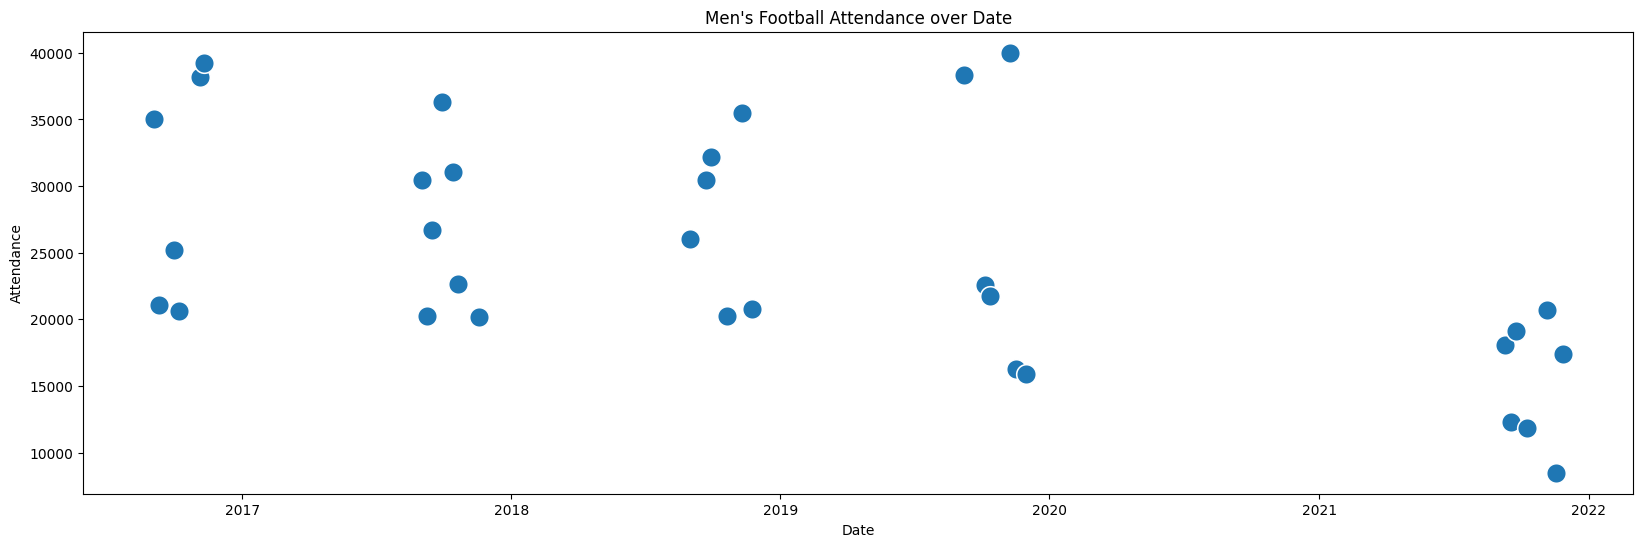

In [115]:
plt.figure(figsize=(20,6))
sns.scatterplot(x='Date', y='Attendance', data=df_MF, s=200)
plt.title("Men's Football Attendance over Date")
plt.savefig(image_path + "Men's Football Attendance over Date.png")
plt.show()

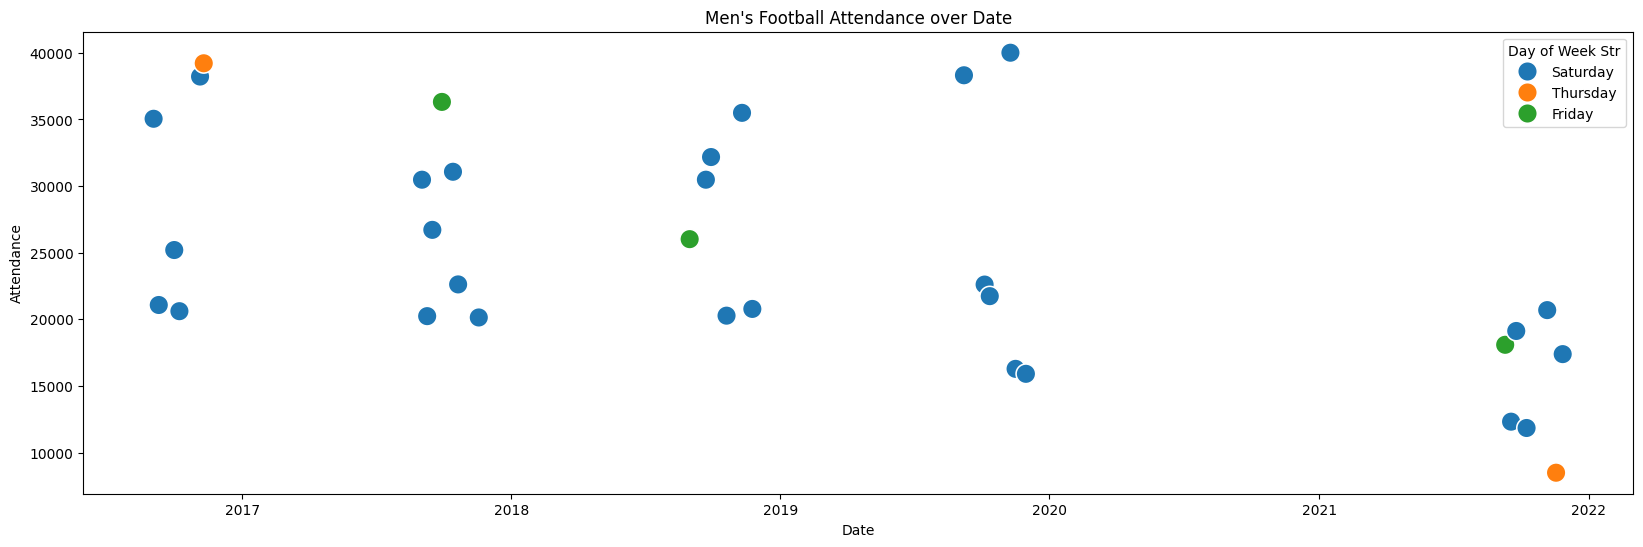

In [116]:
# scatter plot
# color by day of the week
plt.figure(figsize=(20,6))
sns.scatterplot(x='Date', y='Attendance', data=df_MF, hue='Day of Week Str', s=200)
plt.title("Men's Football Attendance over Date")
plt.savefig(image_path + "Men's Football Attendance over Date - Color by Day of Week.png")
plt.show()

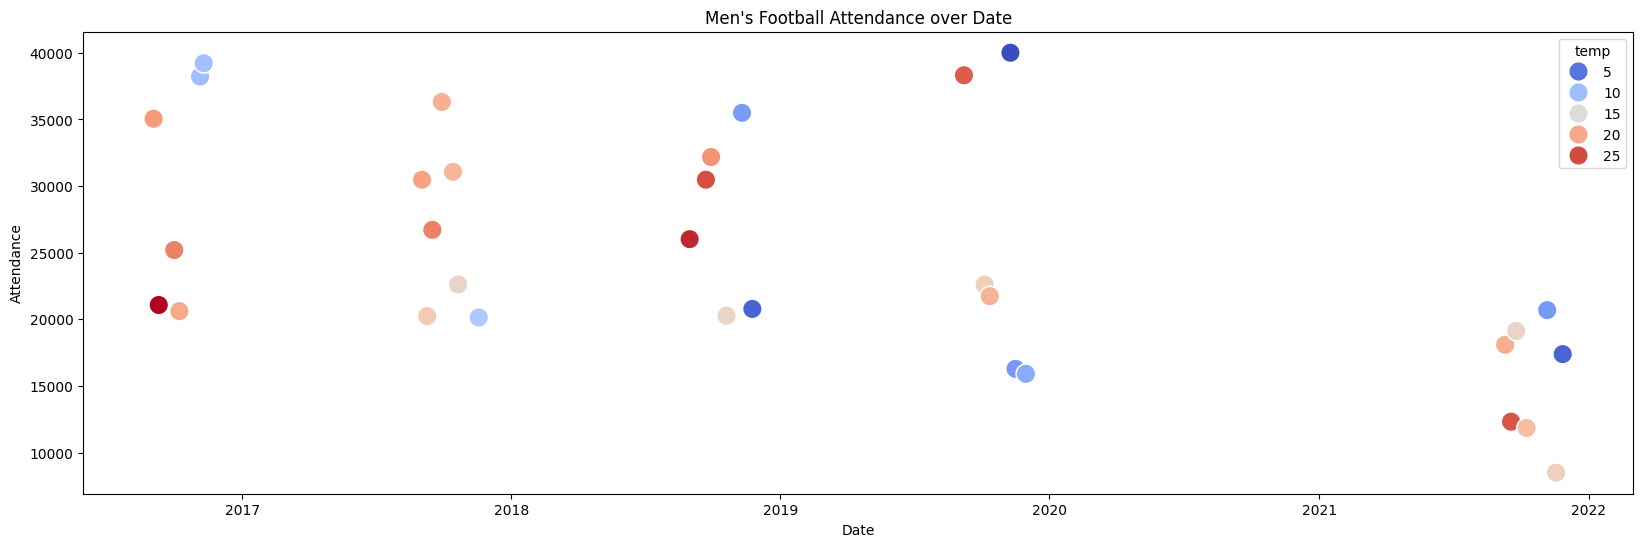

In [117]:
# scatter plot
# color by day temp, blue to red
plt.figure(figsize=(20,6))
sns.scatterplot(x='Date', y='Attendance', data=df_MF, hue='temp', s=200, palette='coolwarm')
plt.title("Men's Football Attendance over Date")
plt.savefig(image_path + "Men's Football Attendance over Date - Color by Temp.png")
plt.show()

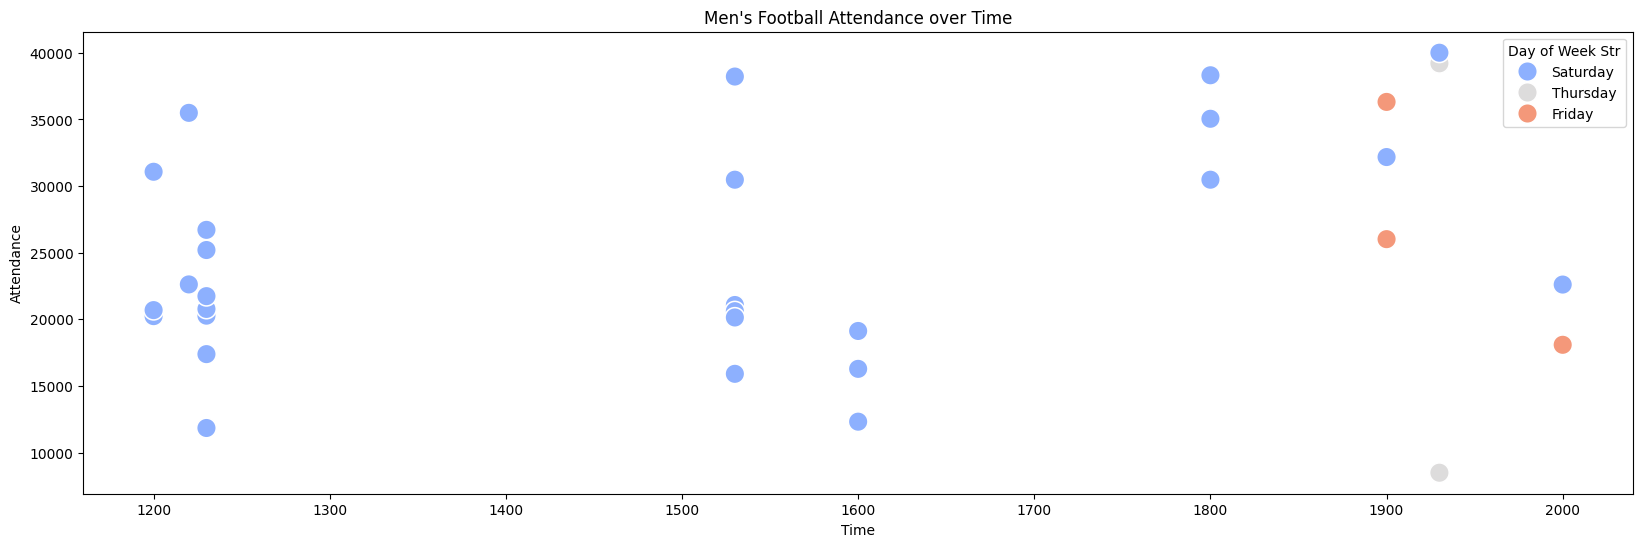

In [118]:
# scatter plot
# color by day temp, blue to red
plt.figure(figsize=(20,6))
sns.scatterplot(x='Time', y='Attendance', data=df_MF, hue='Day of Week Str', s=200, palette='coolwarm')
plt.title("Men's Football Attendance over Time")
plt.savefig(image_path + "Men's Football Attendance over Time - Color by Day of Week.png")
plt.show()

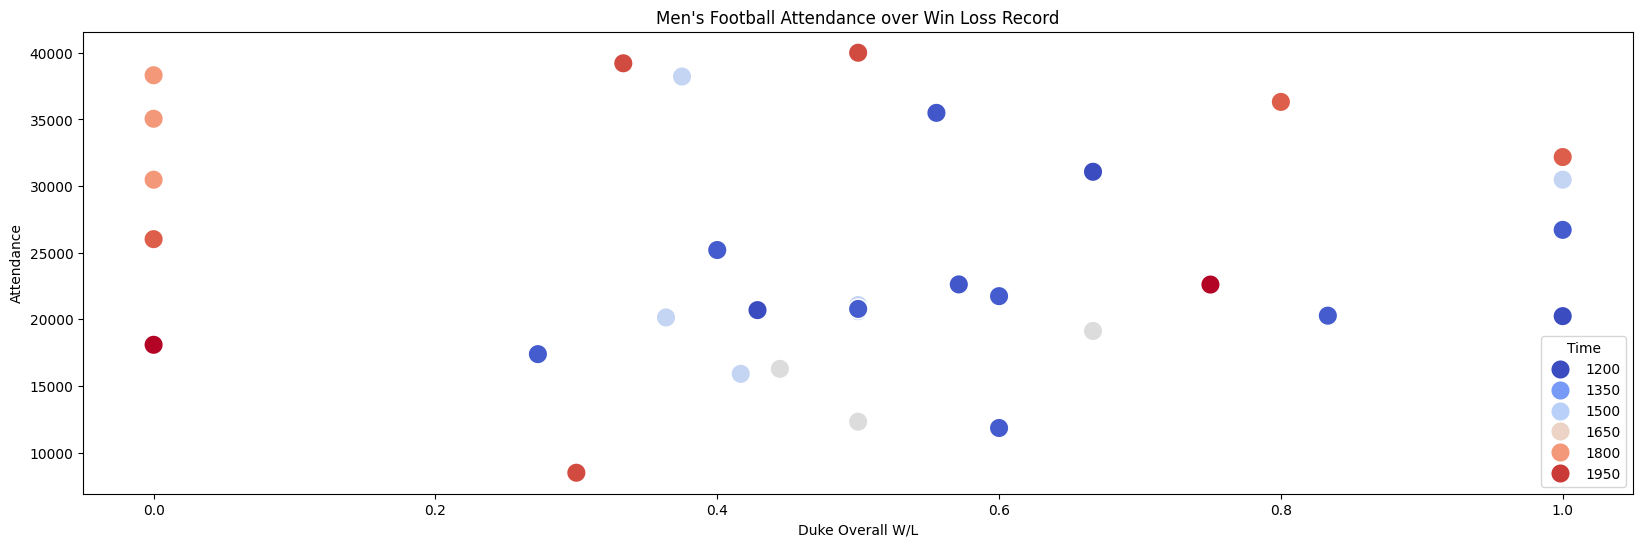

In [119]:
# scatter plot
# color by day temp, blue to red
plt.figure(figsize=(20,6))
sns.scatterplot(x='Duke Overall W/L', y='Attendance', data=df_MF, hue='Time', s=200, palette='coolwarm')
plt.title("Men's Football Attendance over Win Loss Record")
plt.savefig(image_path + "Men's Football Attendance over Win Loss Record - Color by Time of Day.png")
plt.show()

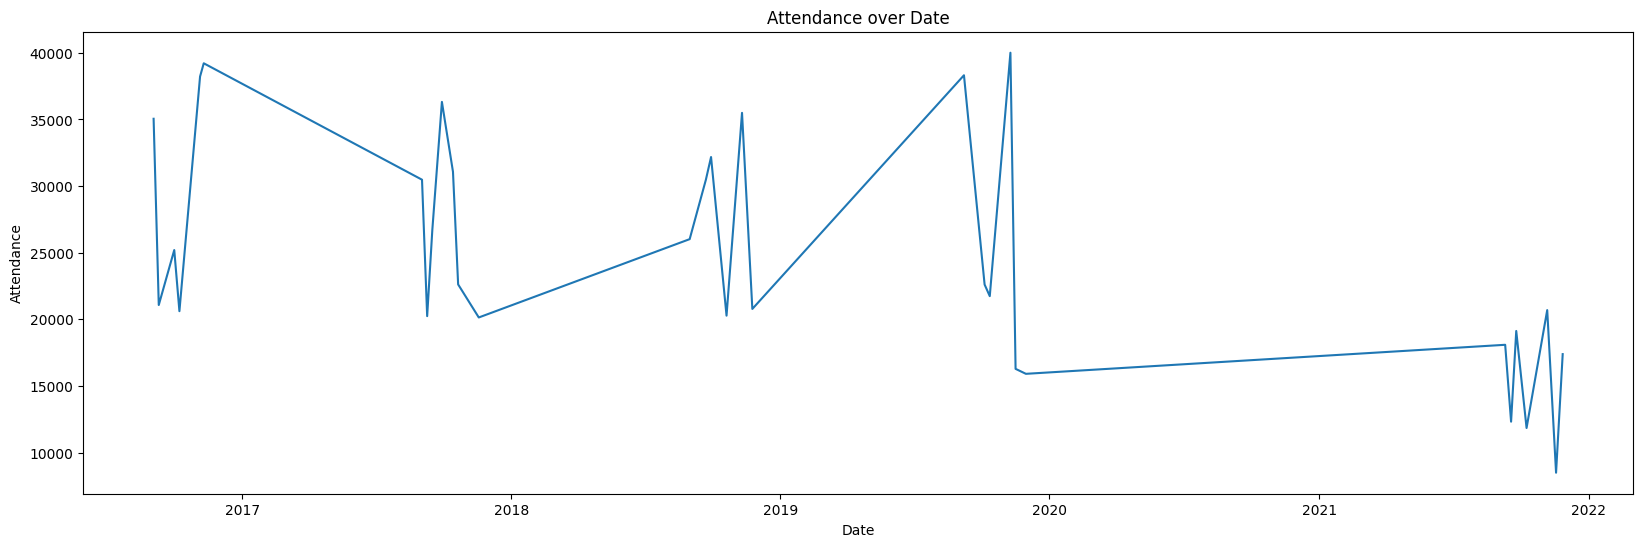

In [120]:
# line plot of attendance over date
figsize = (20, 6)
fig, ax = plt.subplots(figsize=figsize)
sns.lineplot(x='Date', y='Attendance', data=df_MF, ax=ax)
plt.title('Attendance over Date')
plt.xlabel('Date')
plt.ylabel('Attendance')
plt.savefig(image_path + "Men's Football Attendance over Date - Line Graph.png")
plt.show()

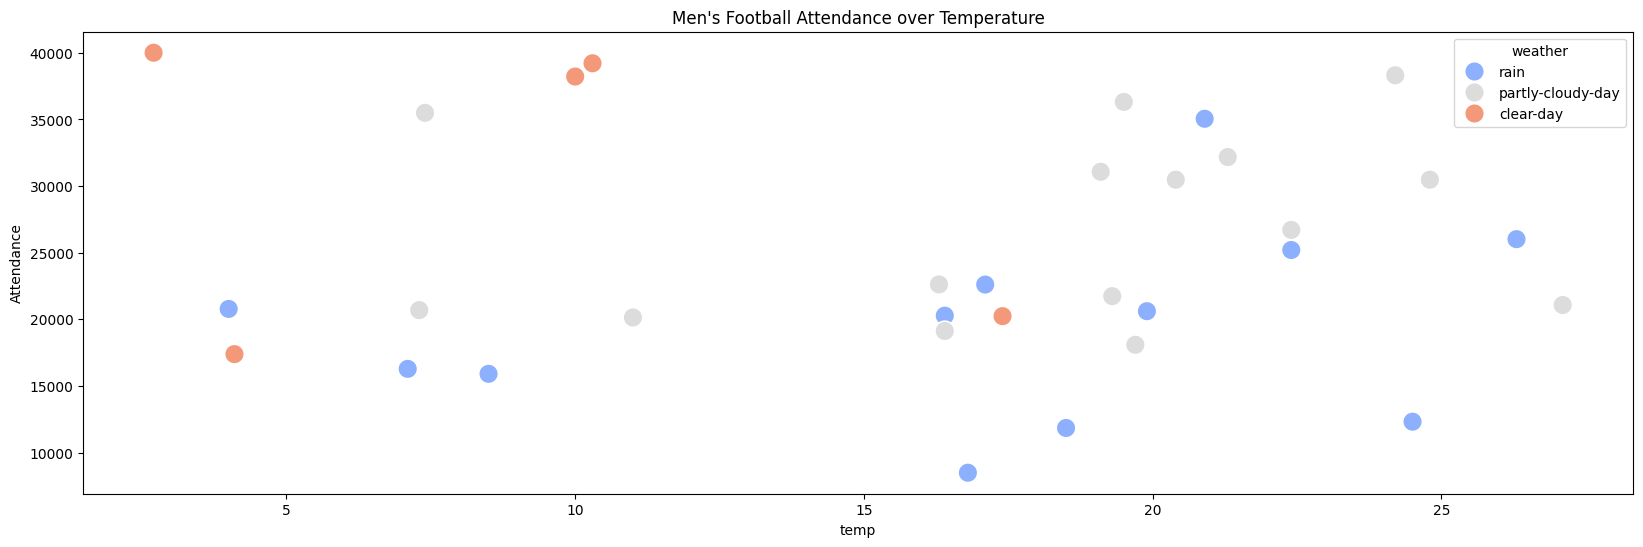

In [121]:
# scatter plot
# color by day temp, blue to red
plt.figure(figsize=(20,6))
sns.scatterplot(x='temp', y='Attendance', data=df_MF, hue='weather', s=200, palette='coolwarm')
plt.title("Men's Football Attendance over Temperature")
plt.savefig(image_path + "Men's Football Attendance over Temperature - Color by Weather.png")
plt.show()

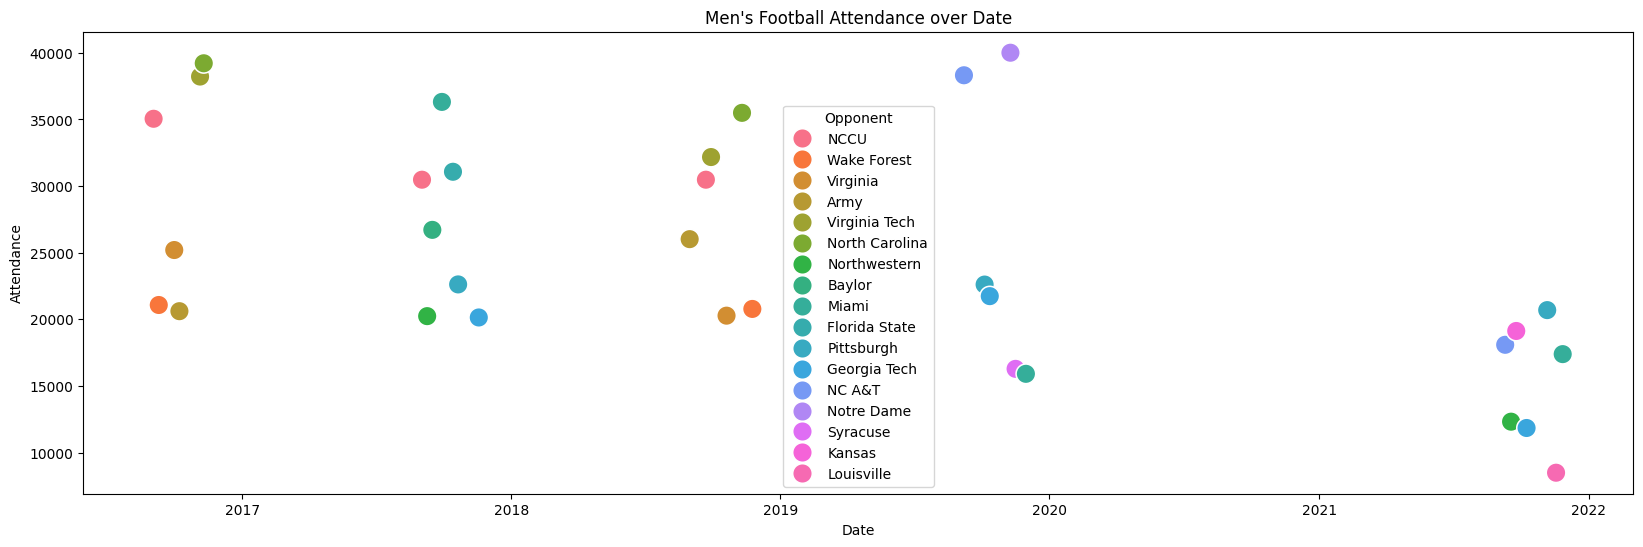

In [122]:
# scatter plot
# color by day temp, blue to red
plt.figure(figsize=(20,6))
sns.scatterplot(x='Date', y='Attendance', data=df_MF, hue='Opponent', s=200)
plt.title("Men's Football Attendance over Date")
plt.savefig(image_path + "Men's Football Attendance over Date - Color by Opponent.png")
plt.show()

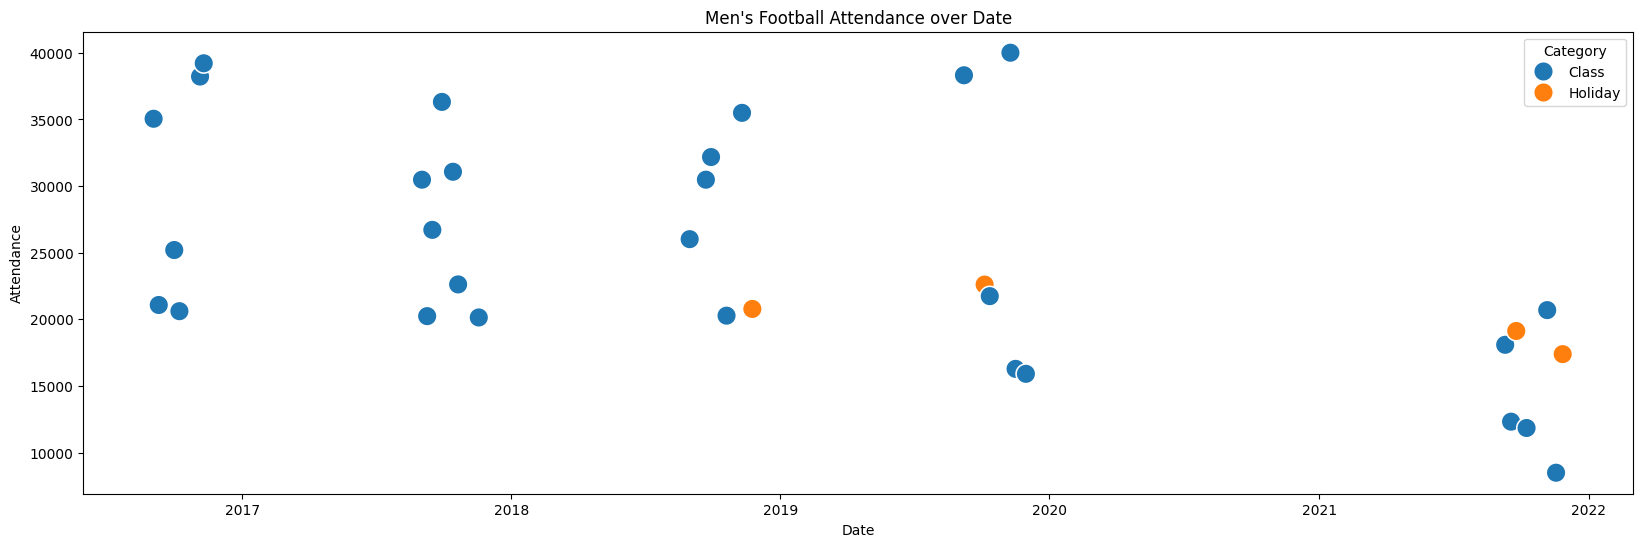

In [123]:
# scatter plot
# color by day temp, blue to red
plt.figure(figsize=(20,6))
sns.scatterplot(x='Date', y='Attendance', data=df_MF, hue='Category', s=200)
plt.title("Men's Football Attendance over Date")
# plt.savefig(image_path + "Men's Football Attendance over Date - Color by Opponent.png")
plt.show()

# Women's Basketball

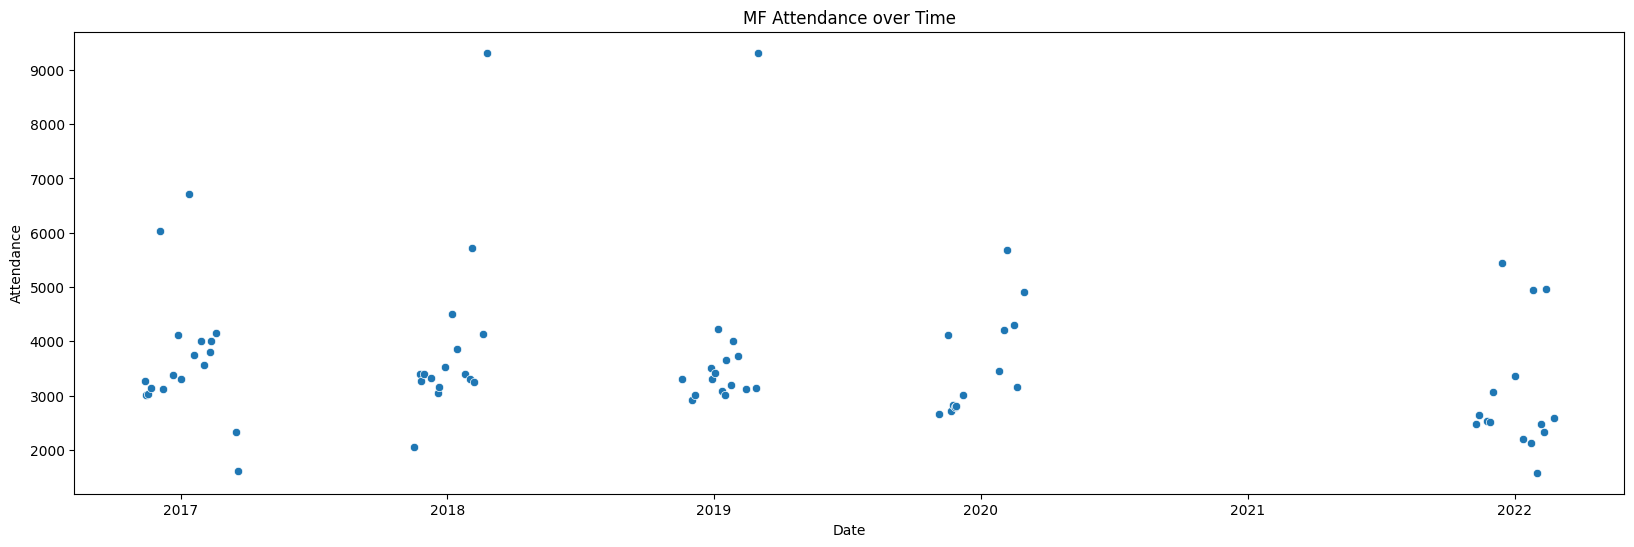

In [124]:
# scatter plot
plt.figure(figsize=(20,6))
sns.scatterplot(x='Date', y='Attendance', data=df_WB)
plt.title('MF Attendance over Time')
plt.show()

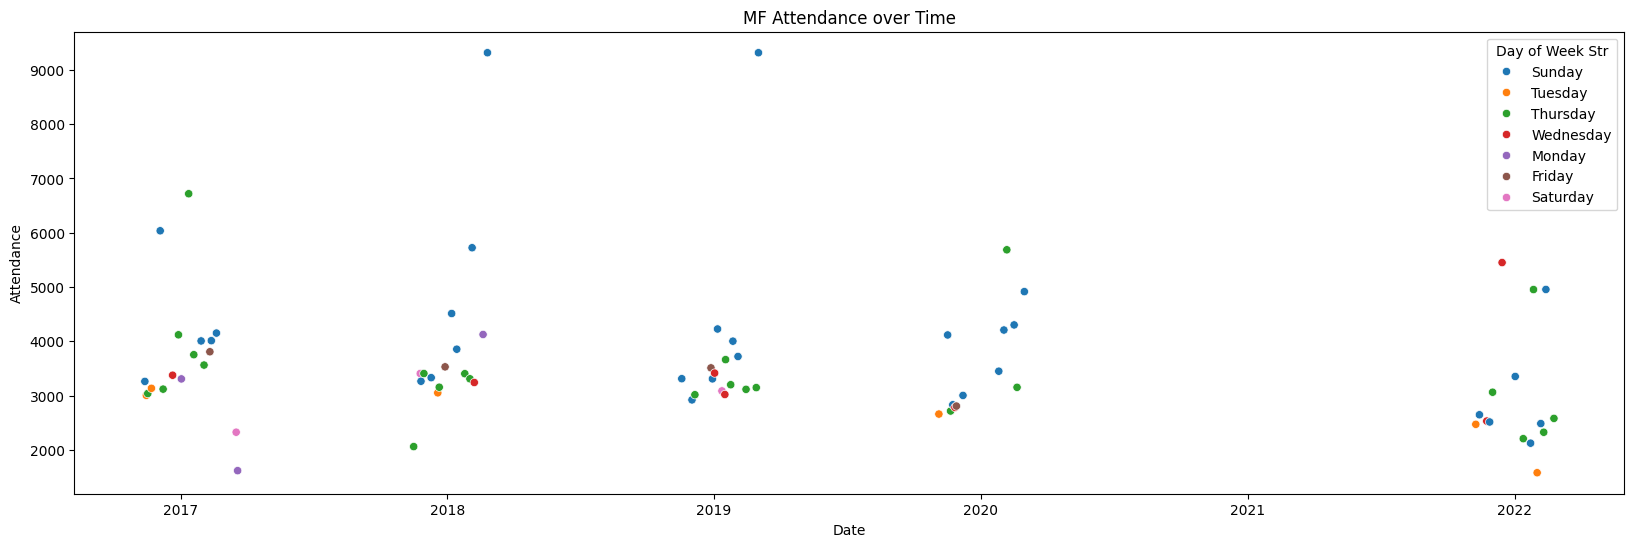

In [125]:
# scatter plot
# color by day of the week
plt.figure(figsize=(20,6))
sns.scatterplot(x='Date', y='Attendance', data=df_WB, hue='Day of Week Str')
plt.title('MF Attendance over Time')
plt.show()

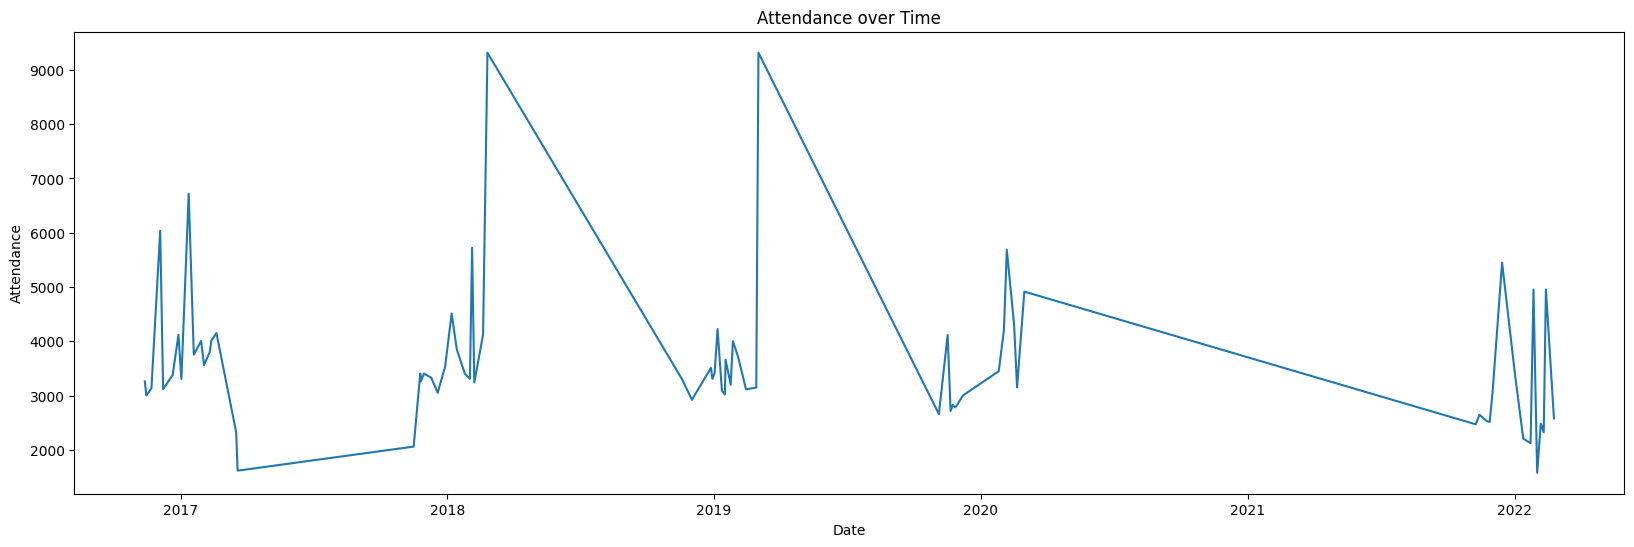

In [129]:
# line plot of attendance over date
figsize = (20, 6)
fig, ax = plt.subplots(figsize=figsize)
sns.lineplot(x='Date', y='Attendance', data=df_WB, ax=ax)
plt.title('Attendance over Time')
plt.xlabel('Date')
plt.ylabel('Attendance')
plt.savefig(image_path + "Women's Basketball Attendance over Date - Line Graph.png")
plt.show()

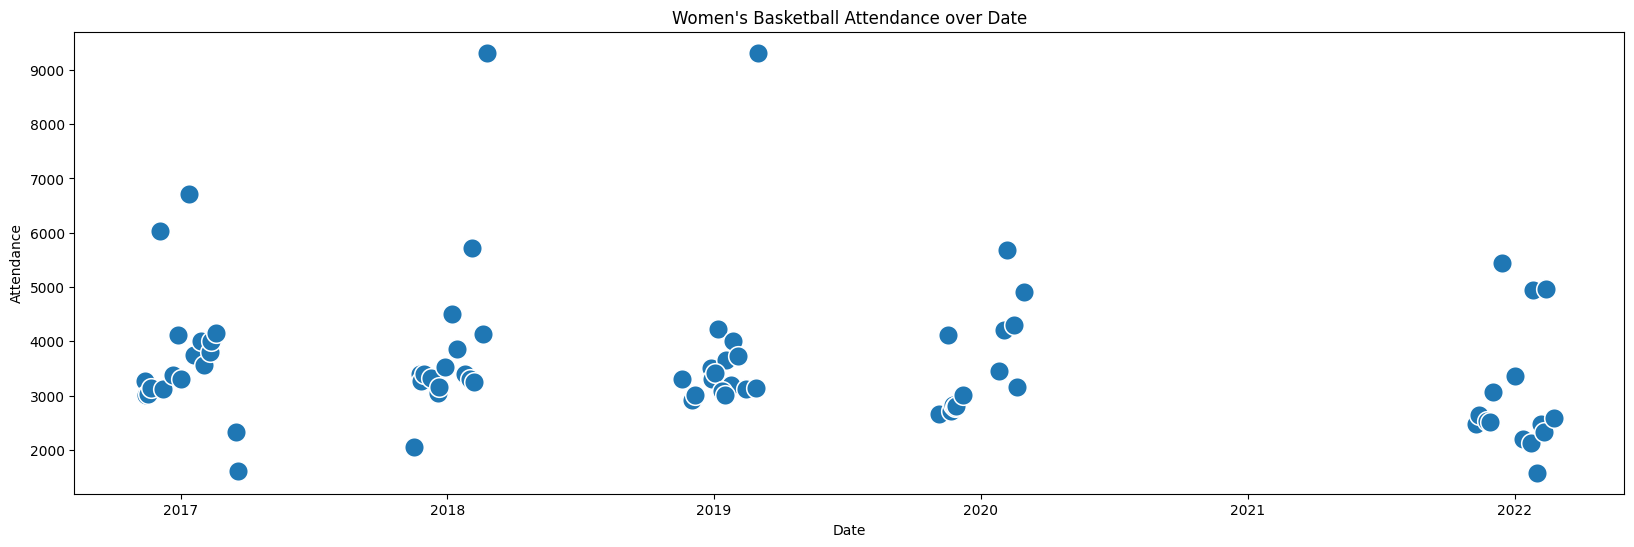

In [128]:
plt.figure(figsize=(20,6))
sns.scatterplot(x='Date', y='Attendance', data=df_WB, s=200)
plt.title("Women's Basketball Attendance over Date")
# plt.savefig(image_path + "Men's Football Attendance over Date.png")
plt.show()

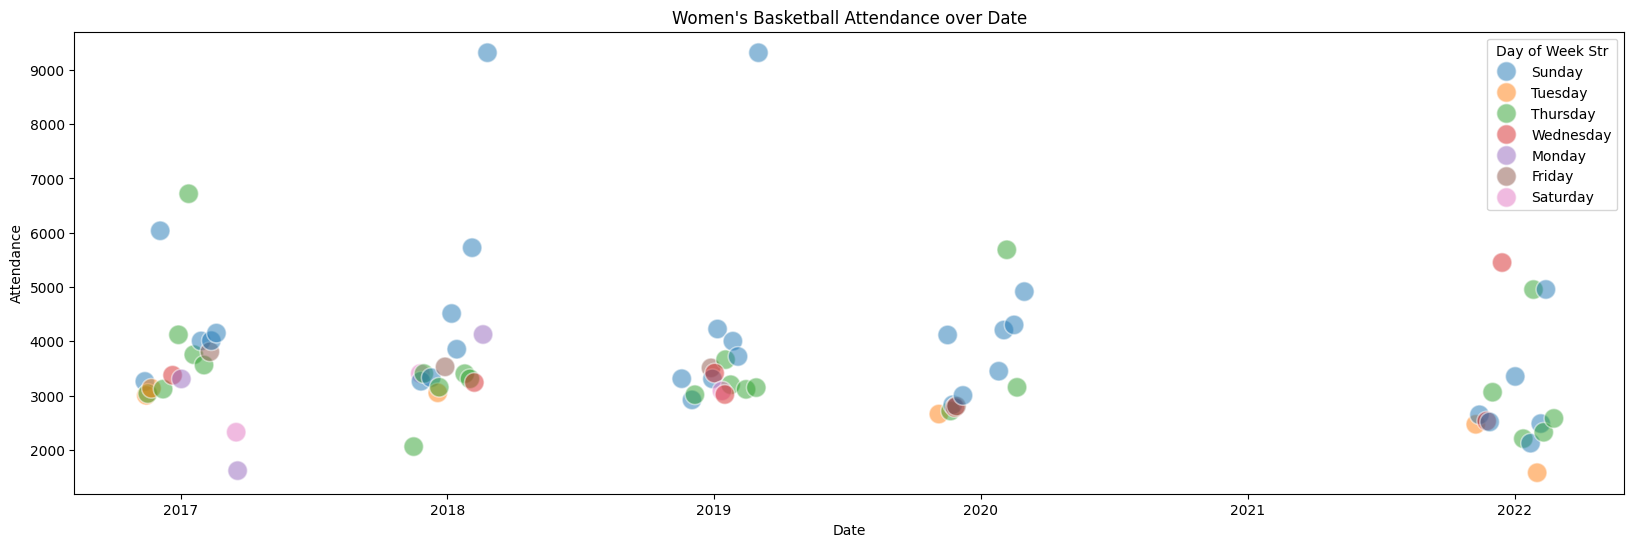

In [133]:
# scatter plot
# color by day of the week
plt.figure(figsize=(20,6))
sns.scatterplot(x='Date', y='Attendance', data=df_WB, hue='Day of Week Str', s=200, alpha = 0.5)
plt.title("Women's Basketball Attendance over Date")
plt.savefig(image_path + "Women's Basketball Attendance over Date - Color by Day of Week.png")
plt.show()

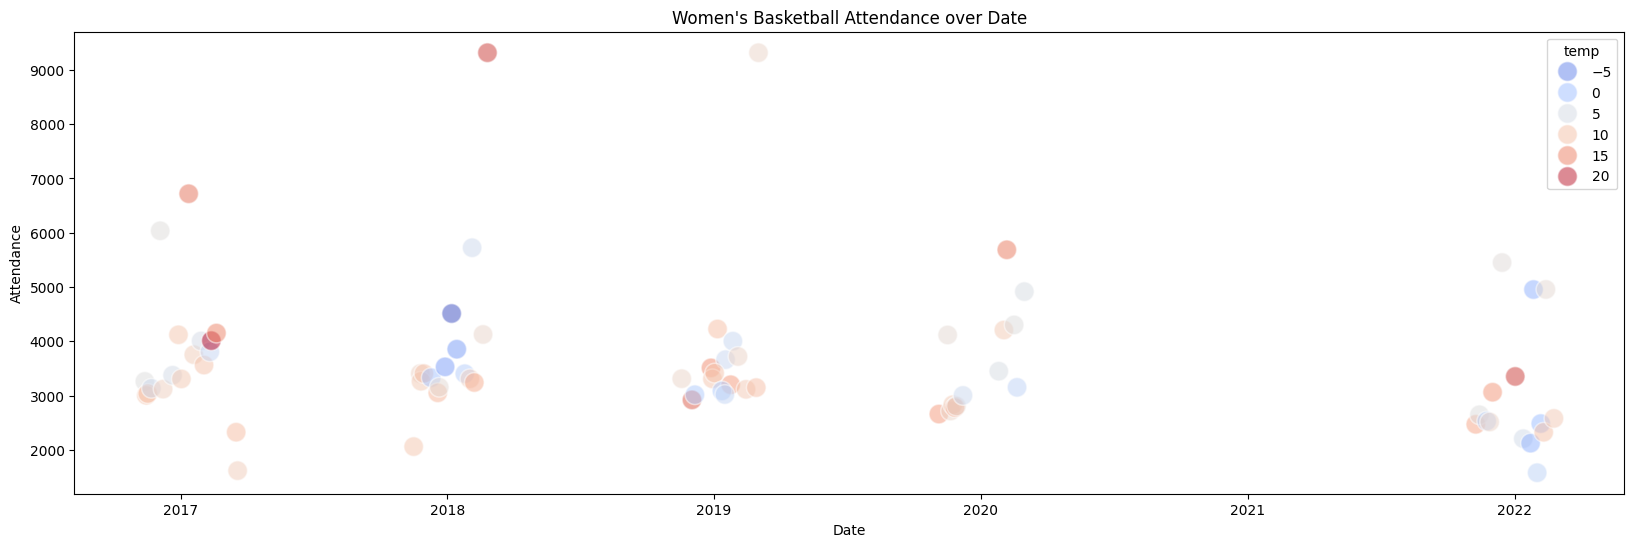

In [137]:
# scatter plot
# color by day temp, blue to red
plt.figure(figsize=(20,6))
sns.scatterplot(x='Date', y='Attendance', data=df_WB, hue='temp', s=200, palette='coolwarm', alpha = 0.5)
plt.title("Women's Basketball Attendance over Date")
plt.savefig(image_path + "Women's Basketball Attendance over Date - Color by Temp.png")
plt.show()

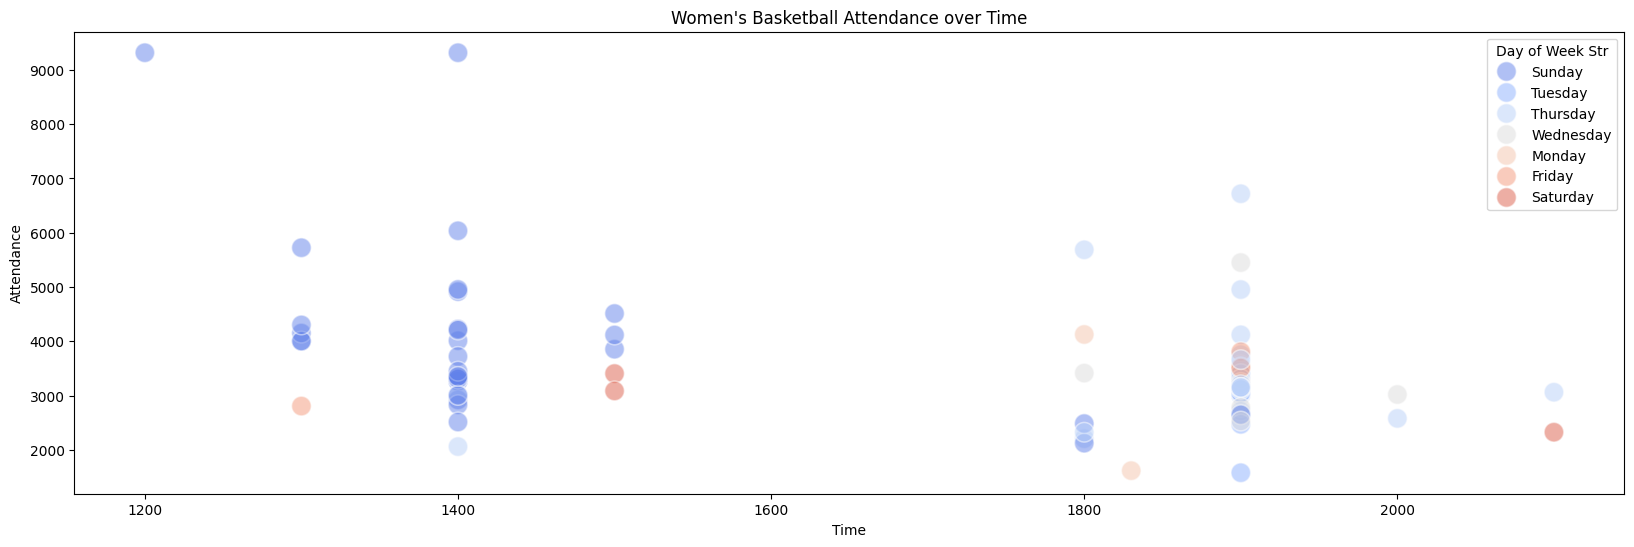

In [141]:
# scatter plot
# color by day temp, blue to red
plt.figure(figsize=(20,6))
sns.scatterplot(x='Time', y='Attendance', data=df_WB, hue='Day of Week Str', s=200, palette='coolwarm', alpha=0.5)
plt.title("Women's Basketball Attendance over Time")
plt.savefig(image_path + "Women's Basketball Attendance over Time - Color by Day of Week.png")
plt.show()

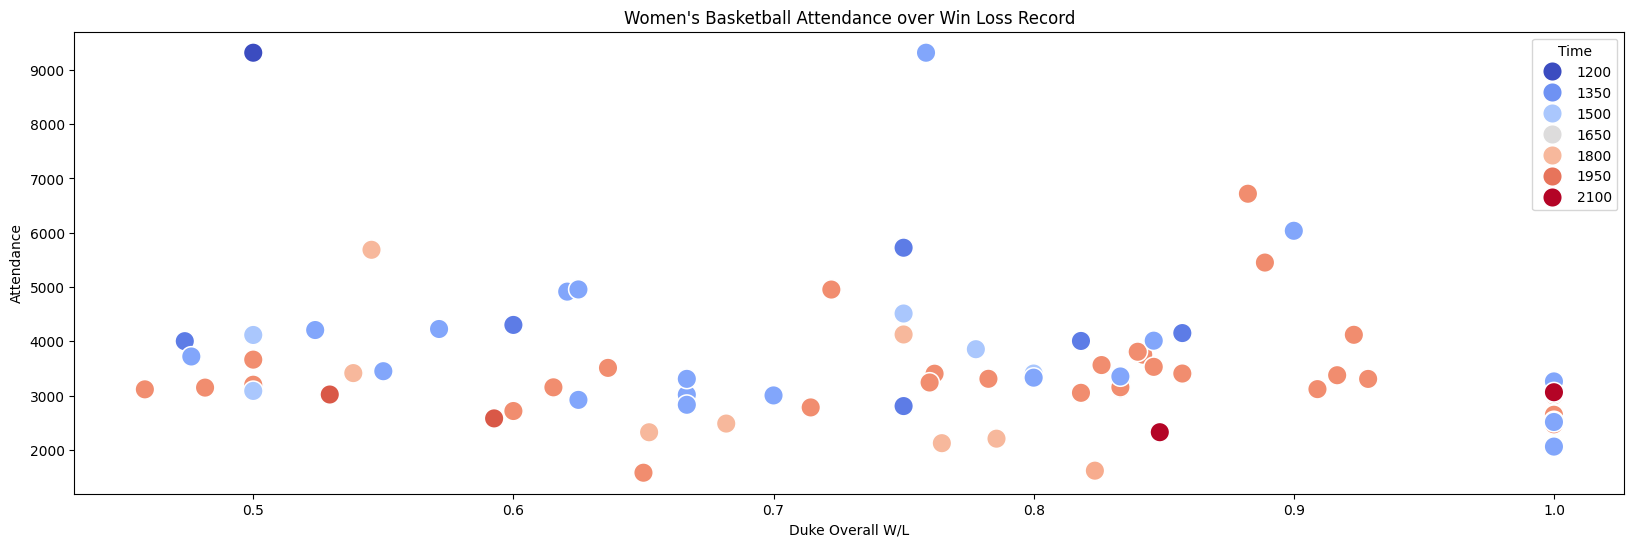

In [143]:
# scatter plot
# color by day temp, blue to red
plt.figure(figsize=(20,6))
sns.scatterplot(x='Duke Overall W/L', y='Attendance', data=df_WB, hue='Time', s=200, palette='coolwarm')
plt.title("Women's Basketball Attendance over Win Loss Record")
plt.savefig(image_path + "Women's Basketball Attendance over Win Loss Record - Color by Time of Day.png")
plt.show()

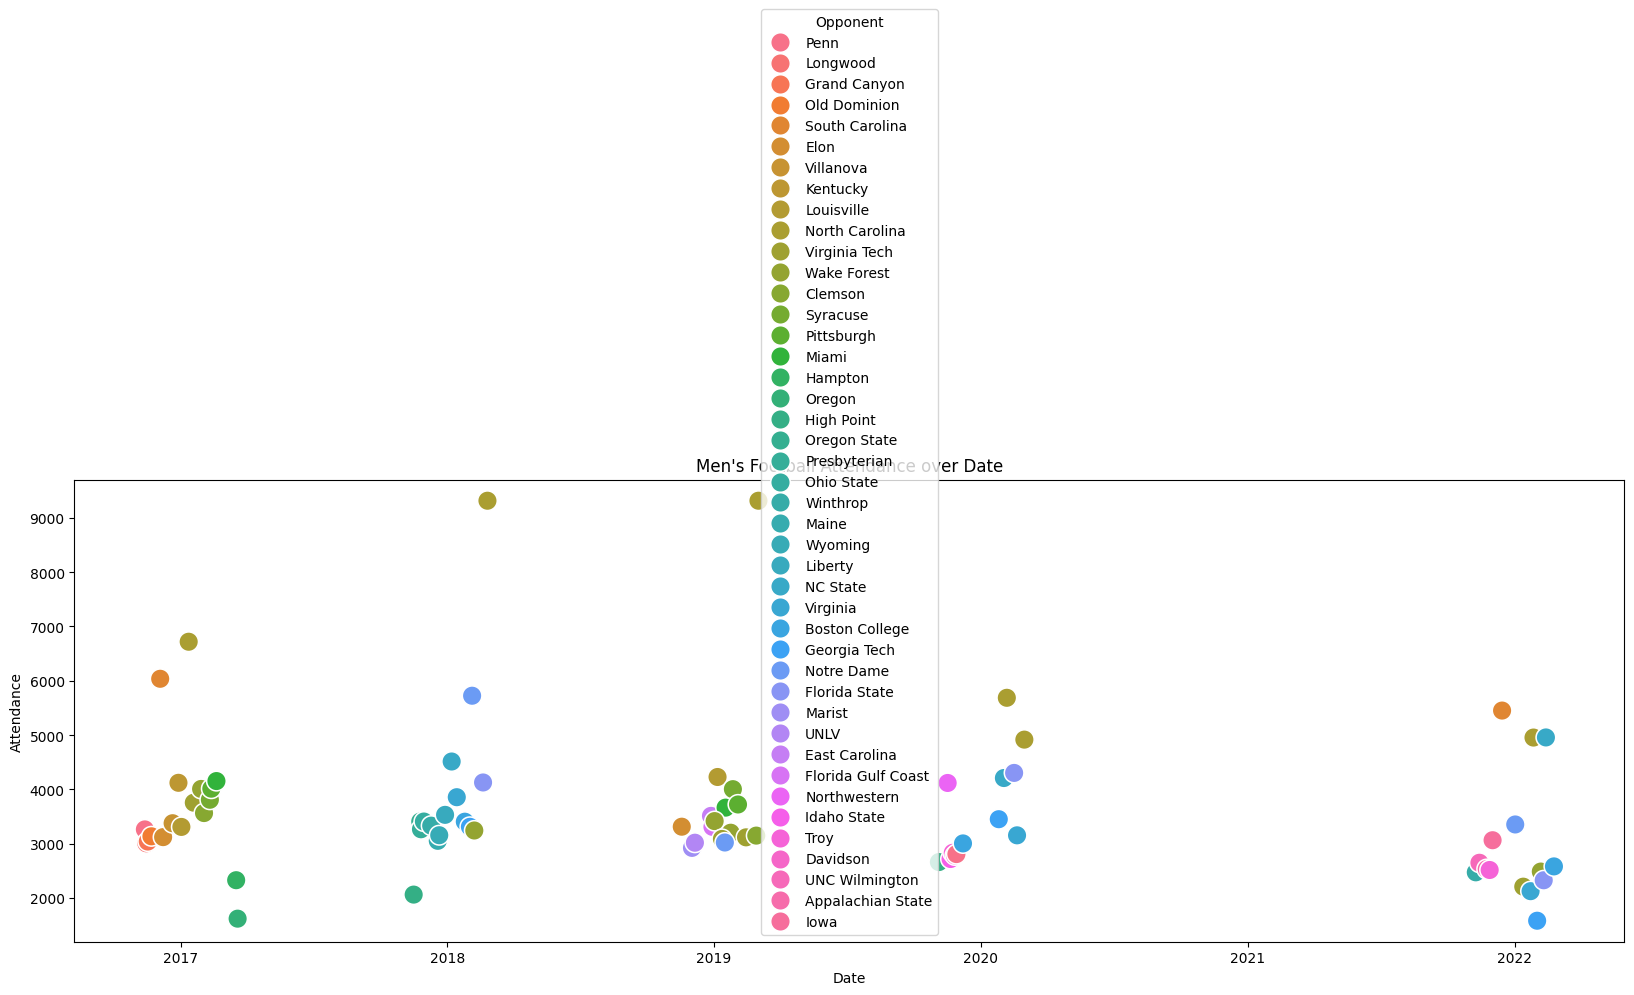

In [144]:
# scatter plot
# color by day temp, blue to red
plt.figure(figsize=(20,6))
sns.scatterplot(x='Date', y='Attendance', data=df_WB, hue='Opponent', s=200)
plt.title("Men's Football Attendance over Date")
# plt.savefig(image_path + "Men's Football Attendance over Date - Color by Opponent.png")
plt.show()

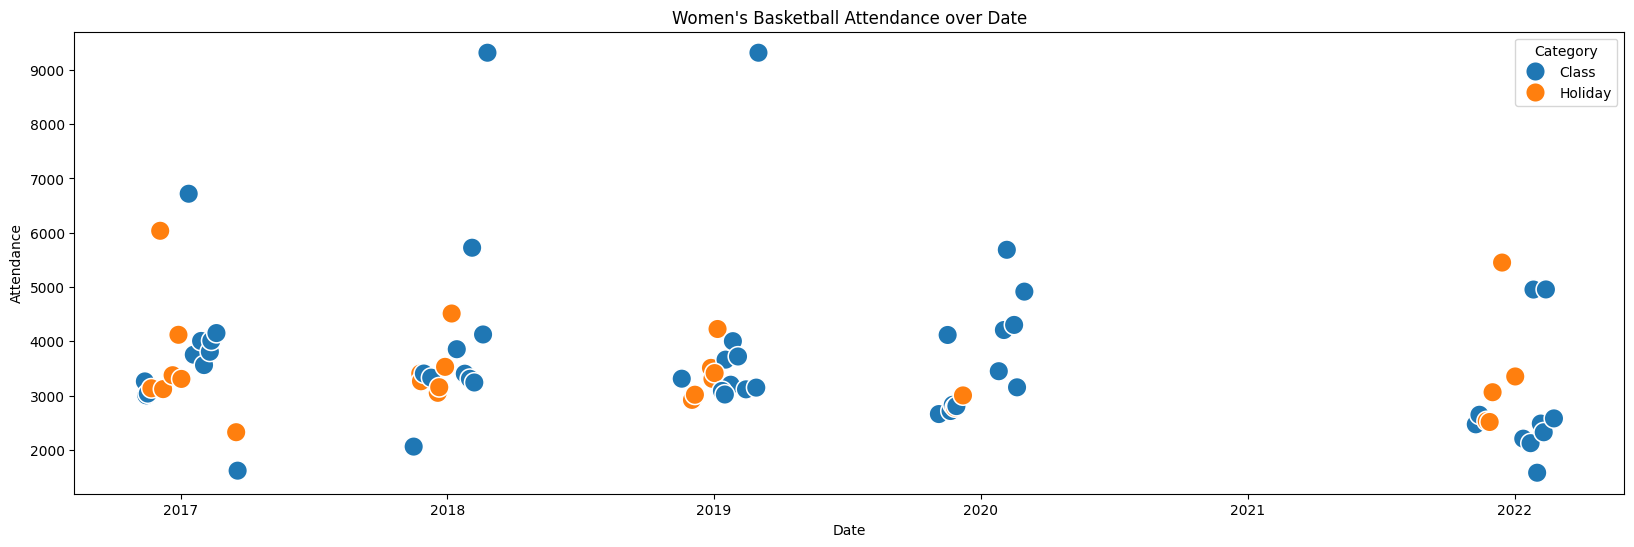

In [147]:
# scatter plot
# color by day temp, blue to red
plt.figure(figsize=(20,6))
sns.scatterplot(x='Date', y='Attendance', data=df_WB, hue='Category', s=200)
plt.title("Women's Basketball Attendance over Date")
plt.savefig(image_path + "Women's Basketball Attendance over Date - Color by Category.png")
plt.show()